### Import Packages 

In [1]:
import os
import math
import random
from pprint import pprint

import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import (
    FunctionTransformer,
    StandardScaler,
    PowerTransformer,
    MinMaxScaler,
)

from tqdm.notebook import tqdm

### Basic Notebook seetings and Package Config

In [2]:
sns.set_theme(style="darkgrid")
pd.set_option("display.max_colwidth", 1000)
random.seed(100)
tqdm.pandas()

### Adding SRC directory to sys path 

In [3]:
parent_directory = os.path.abspath(
    "../.."
)  # Should Point to root directory /Project Directory
os.chdir(parent_directory)

print(f"parent directory {parent_directory}")

datset_dir = os.path.join(parent_directory, "data")

if os.path.isdir(datset_dir) is False:
    raise NotADirectoryError(f"Directory {datset_dir} not valid")

parent directory D:\codespace\python\datascience_ml_handson


### Dataset Loading

In [4]:
dataframe = pd.read_csv(os.path.join(datset_dir, "zomato.csv"), encoding="ISO-8859-1")

print(f"dataset {dataframe.shape}")
dataframe.head()

dataset (9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Makati City",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Makati City",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


#### Duplicate Checking & Removing

In [5]:
dataframe.duplicated().sum()
# dataframe.drop_duplicate(keep='first',inplace=True)
# print(dataframe.duplicated().sum())

0

#### Null Value Checking 

In [6]:
isna = dataframe.isna().sum()
print(isna[isna > 0])

Cuisines    9
dtype: int64


In [7]:
print(dataframe.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
dataframe.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## Data Preprocessing

In [10]:
dataframe = dataframe[dataframe["Country Code"] == 1].reset_index(drop=True)

print(f"dataset {dataframe.shape}")

print(dataframe.columns)

dataframe.head()

dataset (8652, 21)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Civil Lines, Agra",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road, Sanjay Place, Civil Lines, Agra",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


#### Unnecessary Column Removal

In [11]:
columns_2b_removed = [
    "Restaurant Name",
    "Country Code",
    "Address",
    "Locality",
    "Locality Verbose",
    "Currency",
    "Is delivering now",
    "Switch to order menu",
    "Rating color",
    "Rating text",
]


dataframe.drop(columns=columns_2b_removed, inplace=True)

print(f"dataset {dataframe.shape}")

print(dataframe.columns)

dataframe.head()

dataset (8652, 11)
Index(['Restaurant ID', 'City', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')


,Restaurant ID,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes
0,3400025,Agra,78.011544,27.161661,"North Indian, Mughlai",850,No,No,3,3.9,140
1,3400341,Agra,0.000000,0.000000,"North Indian, Mughlai",700,No,No,2,3.5,71
2,3400005,Agra,78.011608,27.160832,North Indian,500,No,No,2,3.6,94
3,3400021,Agra,77.998092,27.195928,Rajasthani,400,No,No,2,4.0,87
4,3400017,Agra,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,No,No,3,4.2,177


#### Null Value Replacement

In [12]:
dataframe["Cuisines"].fillna("", inplace=True)
dataframe["Cuisines"].isna().sum()

0

#### Column Type Casting

In [13]:
dataframe["City"] = dataframe["City"].apply(str)
dataframe["Cuisines"] = dataframe["Cuisines"].apply(str)
dataframe["Has Table booking"] = dataframe["Has Table booking"].apply(str)
dataframe["Has Online delivery"] = dataframe["Has Online delivery"].apply(str)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8652 entries, 0 to 8651
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8652 non-null   int64  
 1   City                  8652 non-null   object 
 2   Longitude             8652 non-null   float64
 3   Latitude              8652 non-null   float64
 4   Cuisines              8652 non-null   object 
 5   Average Cost for two  8652 non-null   int64  
 6   Has Table booking     8652 non-null   object 
 7   Has Online delivery   8652 non-null   object 
 8   Price range           8652 non-null   int64  
 9   Aggregate rating      8652 non-null   float64
 10  Votes                 8652 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 743.7+ KB


#### Trimmimg String Columns

In [14]:
def strip_coulumn(value):
    return value.strip() if isinstance(value, str) else value


dataframe["City"] = dataframe["City"].apply(lambda x: x.strip())
dataframe["Cuisines"] = dataframe["Cuisines"].apply(lambda x: x.strip())
dataframe["Has Table booking"] = dataframe["Has Table booking"].apply(
    lambda x: x.strip()
)
dataframe["Has Online delivery"] = dataframe["Has Online delivery"].apply(
    lambda x: x.strip()
)

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8652 entries, 0 to 8651
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8652 non-null   int64  
 1   City                  8652 non-null   object 
 2   Longitude             8652 non-null   float64
 3   Latitude              8652 non-null   float64
 4   Cuisines              8652 non-null   object 
 5   Average Cost for two  8652 non-null   int64  
 6   Has Table booking     8652 non-null   object 
 7   Has Online delivery   8652 non-null   object 
 8   Price range           8652 non-null   int64  
 9   Aggregate rating      8652 non-null   float64
 10  Votes                 8652 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 743.7+ KB


#### Converting Column To Lowercase

In [15]:
dataframe["City"] = dataframe["City"].apply(lambda x: x.lower())
dataframe["Cuisines"] = dataframe["Cuisines"].apply(lambda x: x.lower())
dataframe["Has Table booking"] = dataframe["Has Table booking"].apply(
    lambda x: x.lower()
)
dataframe["Has Online delivery"] = dataframe["Has Online delivery"].apply(
    lambda x: x.lower()
)

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8652 entries, 0 to 8651
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8652 non-null   int64  
 1   City                  8652 non-null   object 
 2   Longitude             8652 non-null   float64
 3   Latitude              8652 non-null   float64
 4   Cuisines              8652 non-null   object 
 5   Average Cost for two  8652 non-null   int64  
 6   Has Table booking     8652 non-null   object 
 7   Has Online delivery   8652 non-null   object 
 8   Price range           8652 non-null   int64  
 9   Aggregate rating      8652 non-null   float64
 10  Votes                 8652 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 743.7+ KB


#### Analyzing City 

<AxesSubplot: >

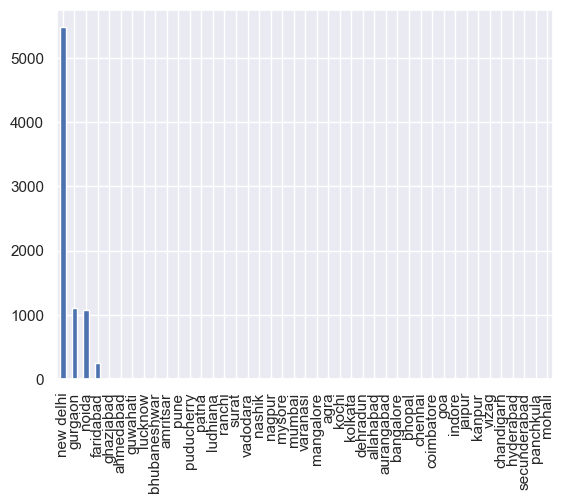

In [16]:
dataframe["City"].value_counts().plot(kind="bar")

['new delhi', 'gurgaon', 'noida', 'faridabad']


<AxesSubplot: >

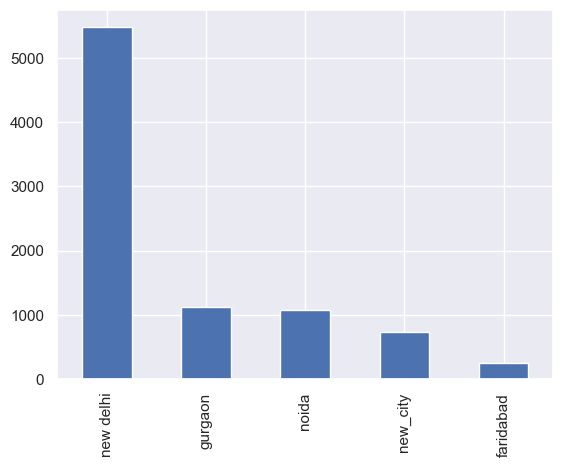

In [17]:
top_4_city = dataframe["City"].value_counts().nlargest(4).index.tolist()
print(top_4_city)
dataframe["City"] = dataframe["City"].apply(
    lambda x: x if x in top_4_city else "new_city"
)

dataframe["City"].value_counts().plot(kind="bar")

In [18]:
dataframe[["City"]].head()

,City
0,new_city
1,new_city
2,new_city
3,new_city
4,new_city


#### Analyzing Has Table booking & Has Online delivery

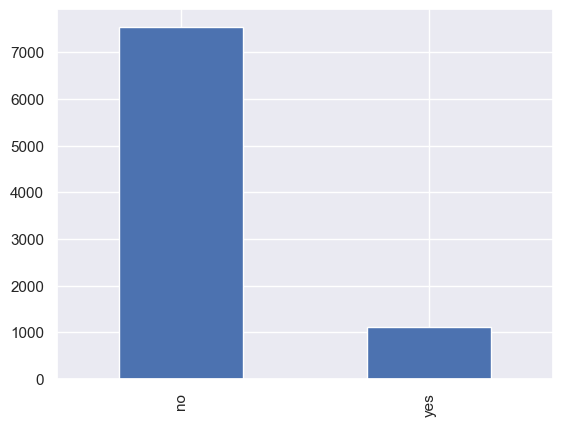

In [19]:
dataframe["Has Table booking"].value_counts().plot(kind="bar")
dataframe["Has Table booking"] = dataframe["Has Table booking"].map({"yes": 1, "no": 0})
dataframe["Has Table booking"] = dataframe["Has Table booking"].astype("int8")

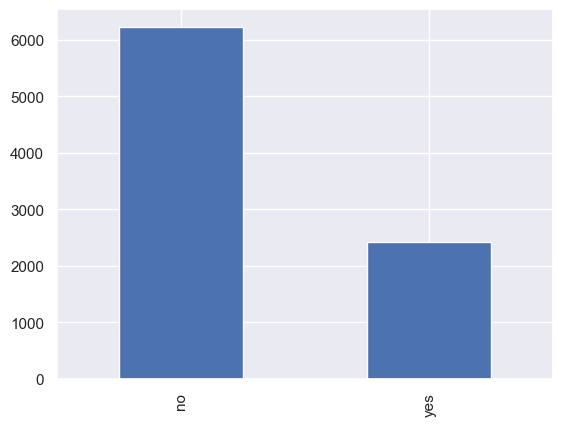

In [20]:
dataframe["Has Online delivery"].value_counts().plot(kind="bar")
dataframe["Has Online delivery"] = dataframe["Has Online delivery"].map(
    {"yes": 1, "no": 0}
)
dataframe["Has Online delivery"] = dataframe["Has Online delivery"].astype("int8")

In [21]:
dataframe[["Has Online delivery", "Has Table booking"]].head()

,Has Online delivery,Has Table booking
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


#### Analyzing Price Range

<AxesSubplot: >

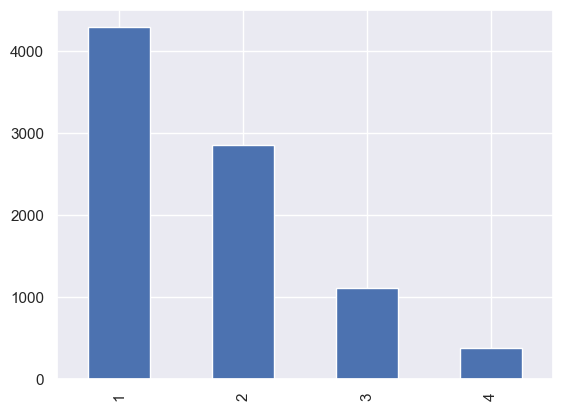

In [22]:
dataframe["Price range"].value_counts().plot(kind="bar")

In [23]:
dataframe["Price range"] = MinMaxScaler().fit_transform(
    dataframe[["Price range"]].values
)

dataframe[["Price range"]].head()

,Price range
0,0.666667
1,0.333333
2,0.333333
3,0.333333
4,0.666667


 #### Analyzing Latitude Longitude

In [24]:
dataframe["Latitude"] = StandardScaler().fit_transform(dataframe[["Latitude"]].values)
dataframe["Longitude"] = StandardScaler().fit_transform(dataframe[["Longitude"]].values)

dataframe[["Latitude", "Longitude"]].head()

,Latitude,Longitude
0,0.106220,0.286113
1,-3.787270,-4.043894
2,0.106101,0.286117
3,0.111132,0.285367
4,0.111963,0.285892


#### Analyzing Average Cost for two

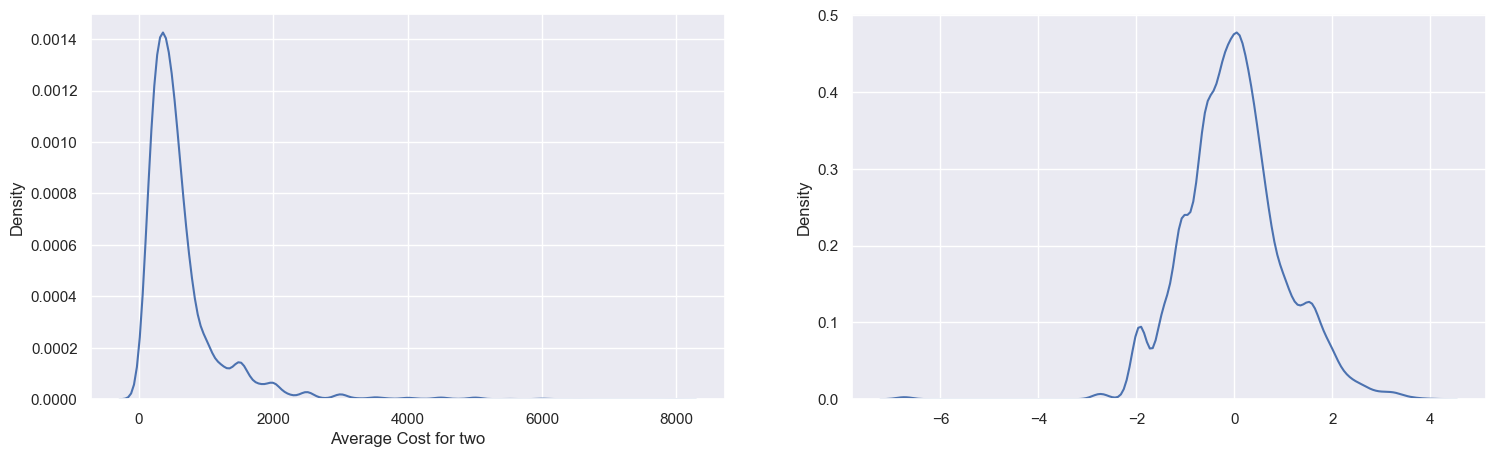

In [25]:
fig, (axs1, axs2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

sns.kdeplot(x="Average Cost for two", data=dataframe, ax=axs1)

pt = PowerTransformer(method="yeo-johnson")

pt_trf = pt.fit_transform(dataframe[["Average Cost for two"]].values)

sns.kdeplot(x=pt_trf.flatten(), ax=axs2)

plt.show()

In [26]:
dataframe["Average Cost for two"] = pt.fit_transform(
    dataframe[["Average Cost for two"]].values
)
dataframe[["Average Cost for two"]].head()

,Average Cost for two
0,0.785840
1,0.523519
2,0.076398
3,-0.214942
4,1.007869


#### Analyzing Votes

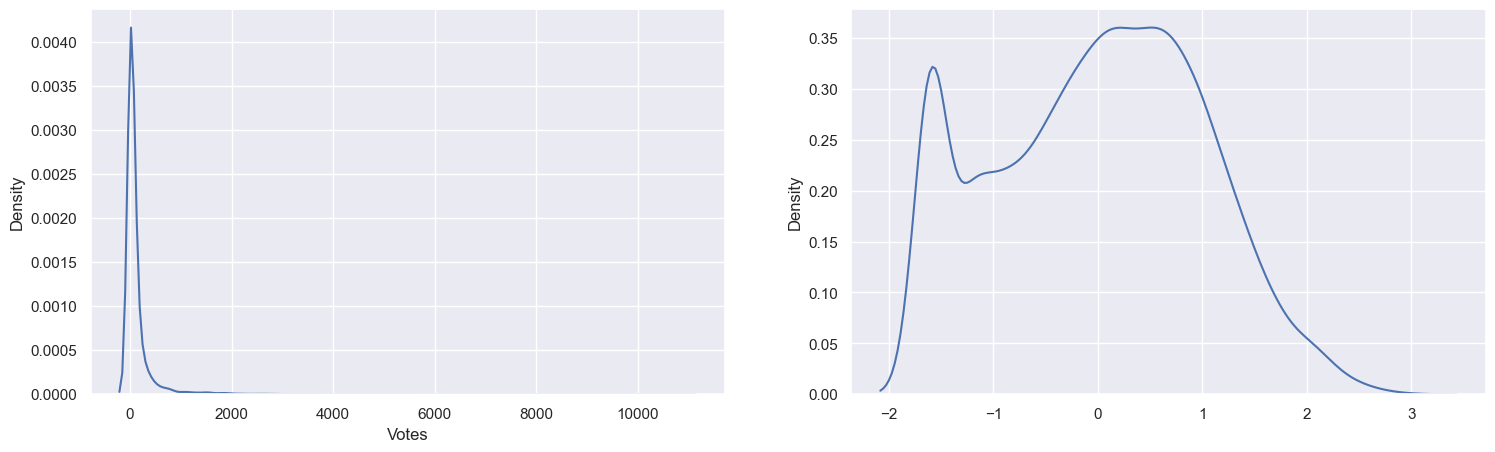

In [27]:
fig, (axs1, axs2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

sns.kdeplot(x="Votes", data=dataframe, ax=axs1)

pt1 = PowerTransformer(method="yeo-johnson", standardize=True)

pt_trf1 = pt1.fit_transform(dataframe[["Votes"]].values)

sns.kdeplot(x=pt_trf1.flatten(), ax=axs2)

plt.show()

In [28]:
dataframe["Votes"] = pt1.fit_transform(dataframe[["Votes"]].values)
dataframe[["Votes"]].head()

,Votes
0,0.908397
1,0.580569
2,0.716229
3,0.678835
4,1.021205


In [29]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8652 entries, 0 to 8651
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8652 non-null   int64  
 1   City                  8652 non-null   object 
 2   Longitude             8652 non-null   float64
 3   Latitude              8652 non-null   float64
 4   Cuisines              8652 non-null   object 
 5   Average Cost for two  8652 non-null   float64
 6   Has Table booking     8652 non-null   int8   
 7   Has Online delivery   8652 non-null   int8   
 8   Price range           8652 non-null   float64
 9   Aggregate rating      8652 non-null   float64
 10  Votes                 8652 non-null   float64
dtypes: float64(6), int64(1), int8(2), object(2)
memory usage: 625.4+ KB


#### Analyzing Cuisines

In [30]:
dataframe["Cuisines"].describe()

count             8652
unique            1392
top       north indian
freq               936
Name: Cuisines, dtype: object

In [31]:
dataframe["Cuisines"].isna().sum()

0

In [32]:
cusisine_lst = []

for item in dataframe["Cuisines"].unique().tolist():
    if item is None or item == "":
        continue
    cusisine_lst.extend([*item.split(",")])

cusisine_lst = [str(item).strip() for item in cusisine_lst]
cusisine_lst = list(set(cusisine_lst))
cusisine_lst.sort()
print(cusisine_lst)
print(len(cusisine_lst))

['afghani', 'african', 'american', 'andhra', 'arabian', 'armenian', 'asian', 'assamese', 'awadhi', 'bakery', 'bbq', 'belgian', 'bengali', 'beverages', 'bihari', 'biryani', 'british', 'burger', 'burmese', 'cafe', 'cajun', 'charcoal grill', 'chettinad', 'chinese', 'continental', 'cuisine varies', 'deli', 'desserts', 'drinks only', 'european', 'fast food', 'finger food', 'french', 'german', 'goan', 'greek', 'gujarati', 'healthy food', 'hyderabadi', 'ice cream', 'indian', 'indonesian', 'iranian', 'italian', 'japanese', 'juices', 'kashmiri', 'kerala', 'korean', 'lebanese', 'lucknowi', 'maharashtrian', 'malaysian', 'malwani', 'mangalorean', 'mediterranean', 'mexican', 'middle eastern', 'mithai', 'modern indian', 'moroccan', 'mughlai', 'naga', 'nepalese', 'north eastern', 'north indian', 'oriya', 'pakistani', 'parsi', 'persian', 'pizza', 'portuguese', 'rajasthani', 'raw meats', 'salad', 'sandwich', 'seafood', 'south american', 'south indian', 'spanish', 'sri lankan', 'steak', 'street food', '

In [33]:
def transform_cusines(cusines_data):
    c_items = cusines_data.split(",")
    c_items = [str(item).strip() for item in c_items]
    indexs_lts = [cusisine_lst.index(item) for item in c_items]

    return_lst = [0] * len(cusisine_lst)
    for idx in indexs_lts:
        return_lst[idx] = 1
    return return_lst


tqdm.pandas(desc="transform_cusines")
dataframe["cusines_list"] = dataframe["Cuisines"].progress_apply(
    lambda x: transform_cusines(x)
)
print(f"dataset {dataframe.shape}")

transform_cusines:   0%|          | 0/8652 [00:00<?, ?it/s]

dataset (8652, 12)


In [34]:
dataframe.columns

Index(['Restaurant ID', 'City', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Price range', 'Aggregate rating', 'Votes', 'cusines_list'],
      dtype='object')

In [35]:
cusines_columns = pd.DataFrame(
    dataframe["cusines_list"].to_list(), columns=cusisine_lst
)

cusines_columns.set_index(dataframe.index, inplace=True)

cusines_columns = cusines_columns.astype("int8")

print(f"cusines_columns shape {cusines_columns.shape}")

cusines_columns.head()

cusines_columns shape (8652, 90)


,afghani,african,american,andhra,arabian,armenian,asian,assamese,awadhi,bakery,...,sri lankan,steak,street food,sushi,tea,tex-mex,thai,tibetan,turkish,vietnamese
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
cusines_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8652 entries, 0 to 8651
Data columns (total 90 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   afghani         8652 non-null   int8 
 1   african         8652 non-null   int8 
 2   american        8652 non-null   int8 
 3   andhra          8652 non-null   int8 
 4   arabian         8652 non-null   int8 
 5   armenian        8652 non-null   int8 
 6   asian           8652 non-null   int8 
 7   assamese        8652 non-null   int8 
 8   awadhi          8652 non-null   int8 
 9   bakery          8652 non-null   int8 
 10  bbq             8652 non-null   int8 
 11  belgian         8652 non-null   int8 
 12  bengali         8652 non-null   int8 
 13  beverages       8652 non-null   int8 
 14  bihari          8652 non-null   int8 
 15  biryani         8652 non-null   int8 
 16  british         8652 non-null   int8 
 17  burger          8652 non-null   int8 
 18  burmese         8652 non-nul

In [37]:
dataframe.drop(columns=["cusines_list", "Cuisines"], inplace=True)

dataframe = pd.concat([dataframe, cusines_columns], axis=1)

print(f"cusines_columns shape {dataframe.shape}")

print(dataframe.columns)

cusines_columns shape (8652, 100)
Index(['Restaurant ID', 'City', 'Longitude', 'Latitude',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Price range', 'Aggregate rating', 'Votes', 'afghani', 'african',
       'american', 'andhra', 'arabian', 'armenian', 'asian', 'assamese',
       'awadhi', 'bakery', 'bbq', 'belgian', 'bengali', 'beverages', 'bihari',
       'biryani', 'british', 'burger', 'burmese', 'cafe', 'cajun',
       'charcoal grill', 'chettinad', 'chinese', 'continental',
       'cuisine varies', 'deli', 'desserts', 'drinks only', 'european',
       'fast food', 'finger food', 'french', 'german', 'goan', 'greek',
       'gujarati', 'healthy food', 'hyderabadi', 'ice cream', 'indian',
       'indonesian', 'iranian', 'italian', 'japanese', 'juices', 'kashmiri',
       'kerala', 'korean', 'lebanese', 'lucknowi', 'maharashtrian',
       'malaysian', 'malwani', 'mangalorean', 'mediterranean', 'mexican',
       'middle eastern', 'mithai', 'modern 

In [38]:
isna = dataframe.isna().sum()
print(isna[isna > 0])

Series([], dtype: int64)


In [39]:
dataframe = dataframe.astype({col: "int8" for col in cusisine_lst})

In [40]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8652 entries, 0 to 8651
Data columns (total 100 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8652 non-null   int64  
 1   City                  8652 non-null   object 
 2   Longitude             8652 non-null   float64
 3   Latitude              8652 non-null   float64
 4   Average Cost for two  8652 non-null   float64
 5   Has Table booking     8652 non-null   int8   
 6   Has Online delivery   8652 non-null   int8   
 7   Price range           8652 non-null   float64
 8   Aggregate rating      8652 non-null   float64
 9   Votes                 8652 non-null   float64
 10  afghani               8652 non-null   int8   
 11  african               8652 non-null   int8   
 12  american              8652 non-null   int8   
 13  andhra                8652 non-null   int8   
 14  arabian               8652 non-null   int8   
 15  armenian            